In [119]:
import obspy 

import matplotlib.pyplot as plt

from obspy import read

from obspy import Stream

import copy

import numpy as np

import pandas as pd

## READ DATA

In [127]:
path_st = '/home/emanuele/data/emanuele/loki-das/cefalonia/Waveforms_Emanuele/noa2024prefy.mseed'
path_save_st = '/home/emanuele/data/emanuele/loki-das/cefalonia/events/prefy/stations/noa2024prefy_filt.mseed'
path =  '/home/emanuele/data/emanuele/loki-das/cefalonia/Waveforms_Emanuele/noa2024prefy_das.mseed'
save_path = '/home/emanuele/data/emanuele/loki-das/cefalonia/events/prefy/fiber/noa2024prefy_das_sel.mseed'
save_path_subsampling = '/home/emanuele/data/emanuele/loki-das/cefalonia/events/prefy/hybrid/noa2024prefy_das_sel_subsampling.mseed'

#path_st = '/home/emanuele/data/emanuele/loki-das/cefalonia/Waveforms_Emanuele/noa2024qalpq.mseed'
#path_save_st = '/home/emanuele/data/emanuele/loki-das/cefalonia/events/qalpq/stations/noa2024qalpq_filt.mseed'
#path =  '/home/emanuele/data/emanuele/loki-das/cefalonia/Waveforms_Emanuele/noa2024qalpq_das.mseed'
#save_path = '/home/emanuele/data/emanuele/loki-das/cefalonia/events/qalpq/fiber/noa2024qalpq_das_sel.mseed'
#save_path_subsampling = '/home/emanuele/data/emanuele/loki-das/cefalonia/events/qalpq/hybrid/noa2024qalpq_das_sel_subsampling.mseed'

#path_st = '/home/emanuele/data/emanuele/loki-das/cefalonia/Waveforms_Emanuele/noa2024pqvcv.mseed'
#path_save_st = '/home/emanuele/data/emanuele/loki-das/cefalonia/events/pqvcv/stations/noa2024pqvcv_filt.mseed'
#path =  '/home/emanuele/data/emanuele/loki-das/cefalonia/Waveforms_Emanuele/noa2024pqvcv_das.mseed'
#save_path = '/home/emanuele/data/emanuele/loki-das/cefalonia/events/pqvcv/fiber/noa2024pqvcv_das_sel.mseed'
#save_path_subsampling = '/home/emanuele/data/emanuele/loki-das/cefalonia/events/pqvcv/hybrid/noa2024pqvcv_das_sel_subsampling.mseed' 

#path_st = '/home/emanuele/data/emanuele/loki-das/cefalonia/Waveforms_Emanuele/noa2024rgjis.mseed'
#path_save_st = '/home/emanuele/data/emanuele/loki-das/cefalonia/events/rgjis/stations/noa2024rgjis_filt.mseed'
#path =  '/home/emanuele/data/emanuele/loki-das/cefalonia/Waveforms_Emanuele/noa2024rgjis_das.mseed'
#save_path = '/home/emanuele/data/emanuele/loki-das/cefalonia/events/rgjis/fiber/noa2024rgjis_das_sel.mseed'
#save_path_subsampling = '/home/emanuele/data/emanuele/loki-das/cefalonia/events/rgjis/hybrid/noa2024rgjis_das_sel_subsampling.mseed'

#path_st = '/home/emanuele/data/emanuele/loki-das/cefalonia/Waveforms_Emanuele/noa2024prlri.mseed'
#path_save_st = '/home/emanuele/data/emanuele/loki-das/cefalonia/events/prlri/stations/noa2024prlri_filt.mseed'
#path =  '/home/emanuele/data/emanuele/loki-das/cefalonia/events/noa2024prlri_das.mseed'
#save_path = '/home/emanuele/data/emanuele/loki-das/cefalonia/events/prlri/fiber/noa2024prlri_das_sel.mseed'
#save_path_subsampling = '/home/emanuele/data/emanuele/loki-das/cefalonia/events/prlri/hybrid/noa2024prlri_das_sel_subsampling.mseed'

#path_st = '/home/emanuele/data/emanuele/loki-das/cefalonia/Waveforms_Emanuele/noa2024qmbey.mseed'
#path_save_st = '/home/emanuele/data/emanuele/loki-das/cefalonia/events/qmbey/stations/noa2024qmbey_filt.mseed'
#path =  '/home/emanuele/data/emanuele/loki-das/cefalonia/Waveforms_Emanuele/noa2024qmbey_das.mseed'
#save_path = '/home/emanuele/data/emanuele/loki-das/cefalonia/events/qmbey/fiber/noa2024qmbey_das_sel.mseed'
#save_path_subsampling = '/home/emanuele/data/emanuele/loki-das/cefalonia/events/qmbey/hybrid/noa2024qmbey_das_sel_subsampling.mseed'


#path_st = '/home/emanuele/data/emanuele/loki-das/cefalonia/Waveforms_Emanuele/noa2024qsmcp.mseed'
#path_save_st = '/home/emanuele/data/emanuele/loki-das/cefalonia/events/qsmcp/stations/noa2024qsmcp_filt.mseed'
#path =  '/home/emanuele/data/emanuele/loki-das/cefalonia/Waveforms_Emanuele/noa2024qsmcp_das.mseed'
#save_path = '/home/emanuele/data/emanuele/loki-das/cefalonia/events/qsmcp/fiber/noa2024qsmcp_das_sel.mseed'
#save_path_subsampling = '/home/emanuele/data/emanuele/loki-das/cefalonia/events/qsmcp/hybrid/noa2024qsmcp_das_sel_subsampling.mseed'

st = read(path_st)

print(st)

sta_filt = st.copy()

sta_filt = sta_filt.detrend("demean")  
sta_filt = sta_filt.taper(0.05, type='cosine')
sta_filt = sta_filt.filter("bandpass", freqmin=2.0, freqmax = 10)  
sta_filt.normalize()

print(sta_filt)

stations_sf = sta_filt[0].stats.sampling_rate 

print(stations_sf)



sta_filt.write(path_save_st, format="MSEED")


15 Trace(s) in Stream:
HA.ATHR..HHZ | 2024-08-10T19:20:17.980000Z - 2024-08-10T19:20:39.980000Z | 100.0 Hz, 2201 samples
HA.ATHR..HHE | 2024-08-10T19:20:17.980000Z - 2024-08-10T19:20:39.980000Z | 100.0 Hz, 2201 samples
HA.ATHR..HHN | 2024-08-10T19:20:17.980000Z - 2024-08-10T19:20:39.980000Z | 100.0 Hz, 2201 samples
HL.VLS..HHZ  | 2024-08-10T19:20:17.980000Z - 2024-08-10T19:20:39.980000Z | 100.0 Hz, 2201 samples
HL.VLS..HHE  | 2024-08-10T19:20:17.980000Z - 2024-08-10T19:20:39.980000Z | 100.0 Hz, 2201 samples
HL.VLS..HHN  | 2024-08-10T19:20:17.980000Z - 2024-08-10T19:20:39.980000Z | 100.0 Hz, 2201 samples
HP.FSK..HHN  | 2024-08-10T19:20:17.980000Z - 2024-08-10T19:20:39.980000Z | 100.0 Hz, 2201 samples
HP.FSK..HHE  | 2024-08-10T19:20:17.980000Z - 2024-08-10T19:20:39.980000Z | 100.0 Hz, 2201 samples
HP.FSK..HHZ  | 2024-08-10T19:20:17.980000Z - 2024-08-10T19:20:39.980000Z | 100.0 Hz, 2201 samples
HT.DMLN..HHN | 2024-08-10T19:20:17.980000Z - 2024-08-10T19:20:39.980000Z | 100.0 Hz, 2201 sampl

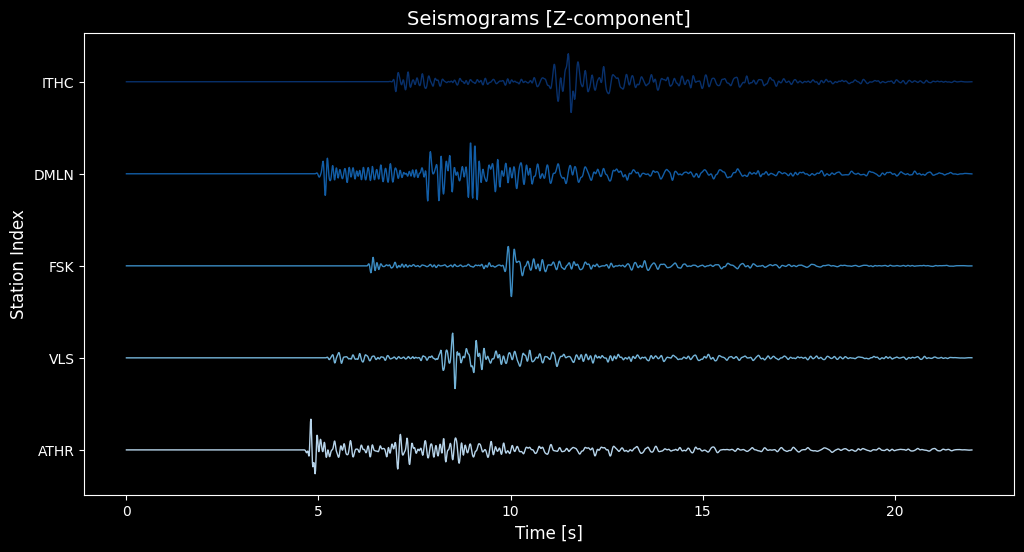

In [121]:
import matplotlib.pyplot as plt
import numpy as np
from obspy import read

# Normalize each trace (assuming sta_filt is a Stream containing filtered traces)
for tr in sta_filt:
    tr.data = tr.data / np.max(np.abs(tr.data))

# Create the figure with a dark background
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_facecolor("black")
fig.patch.set_facecolor("black")

# Filter for Z-component traces only
z_traces = [tr for tr in sta_filt if tr.stats.channel[-1] == "Z"]

# Define colors and station labels
colors = plt.cm.Blues(np.linspace(0.3, 1, len(z_traces)))  # Gradient from light blue to dark blue
station_labels = [tr.stats.station for tr in z_traces]

# Time axis
t = np.linspace(0, z_traces[0].stats.npts / z_traces[0].stats.sampling_rate, z_traces[0].stats.npts)

# Plot each Z-component trace with an offset
offset = 3  # Vertical offset between traces (you can adjust this value)
for i, tr in enumerate(z_traces):
    ax.plot(t, tr.data + i * offset, color=colors[i], lw=1)

# Formatting
ax.set_xlabel("Time [s]", color="white", fontsize=12)
ax.set_ylabel("Station Index", color="white", fontsize=12)
ax.set_yticks(np.arange(len(z_traces)) * offset)
ax.set_yticklabels(station_labels, color="white", fontsize=10)
ax.spines["top"].set_color("white")
ax.spines["bottom"].set_color("white")
ax.spines["left"].set_color("white")
ax.spines["right"].set_color("white")
ax.tick_params(colors="white")

# Title
ax.set_title("Seismograms [Z-component]", color="white", fontsize=14)

# Show the plot
plt.show()


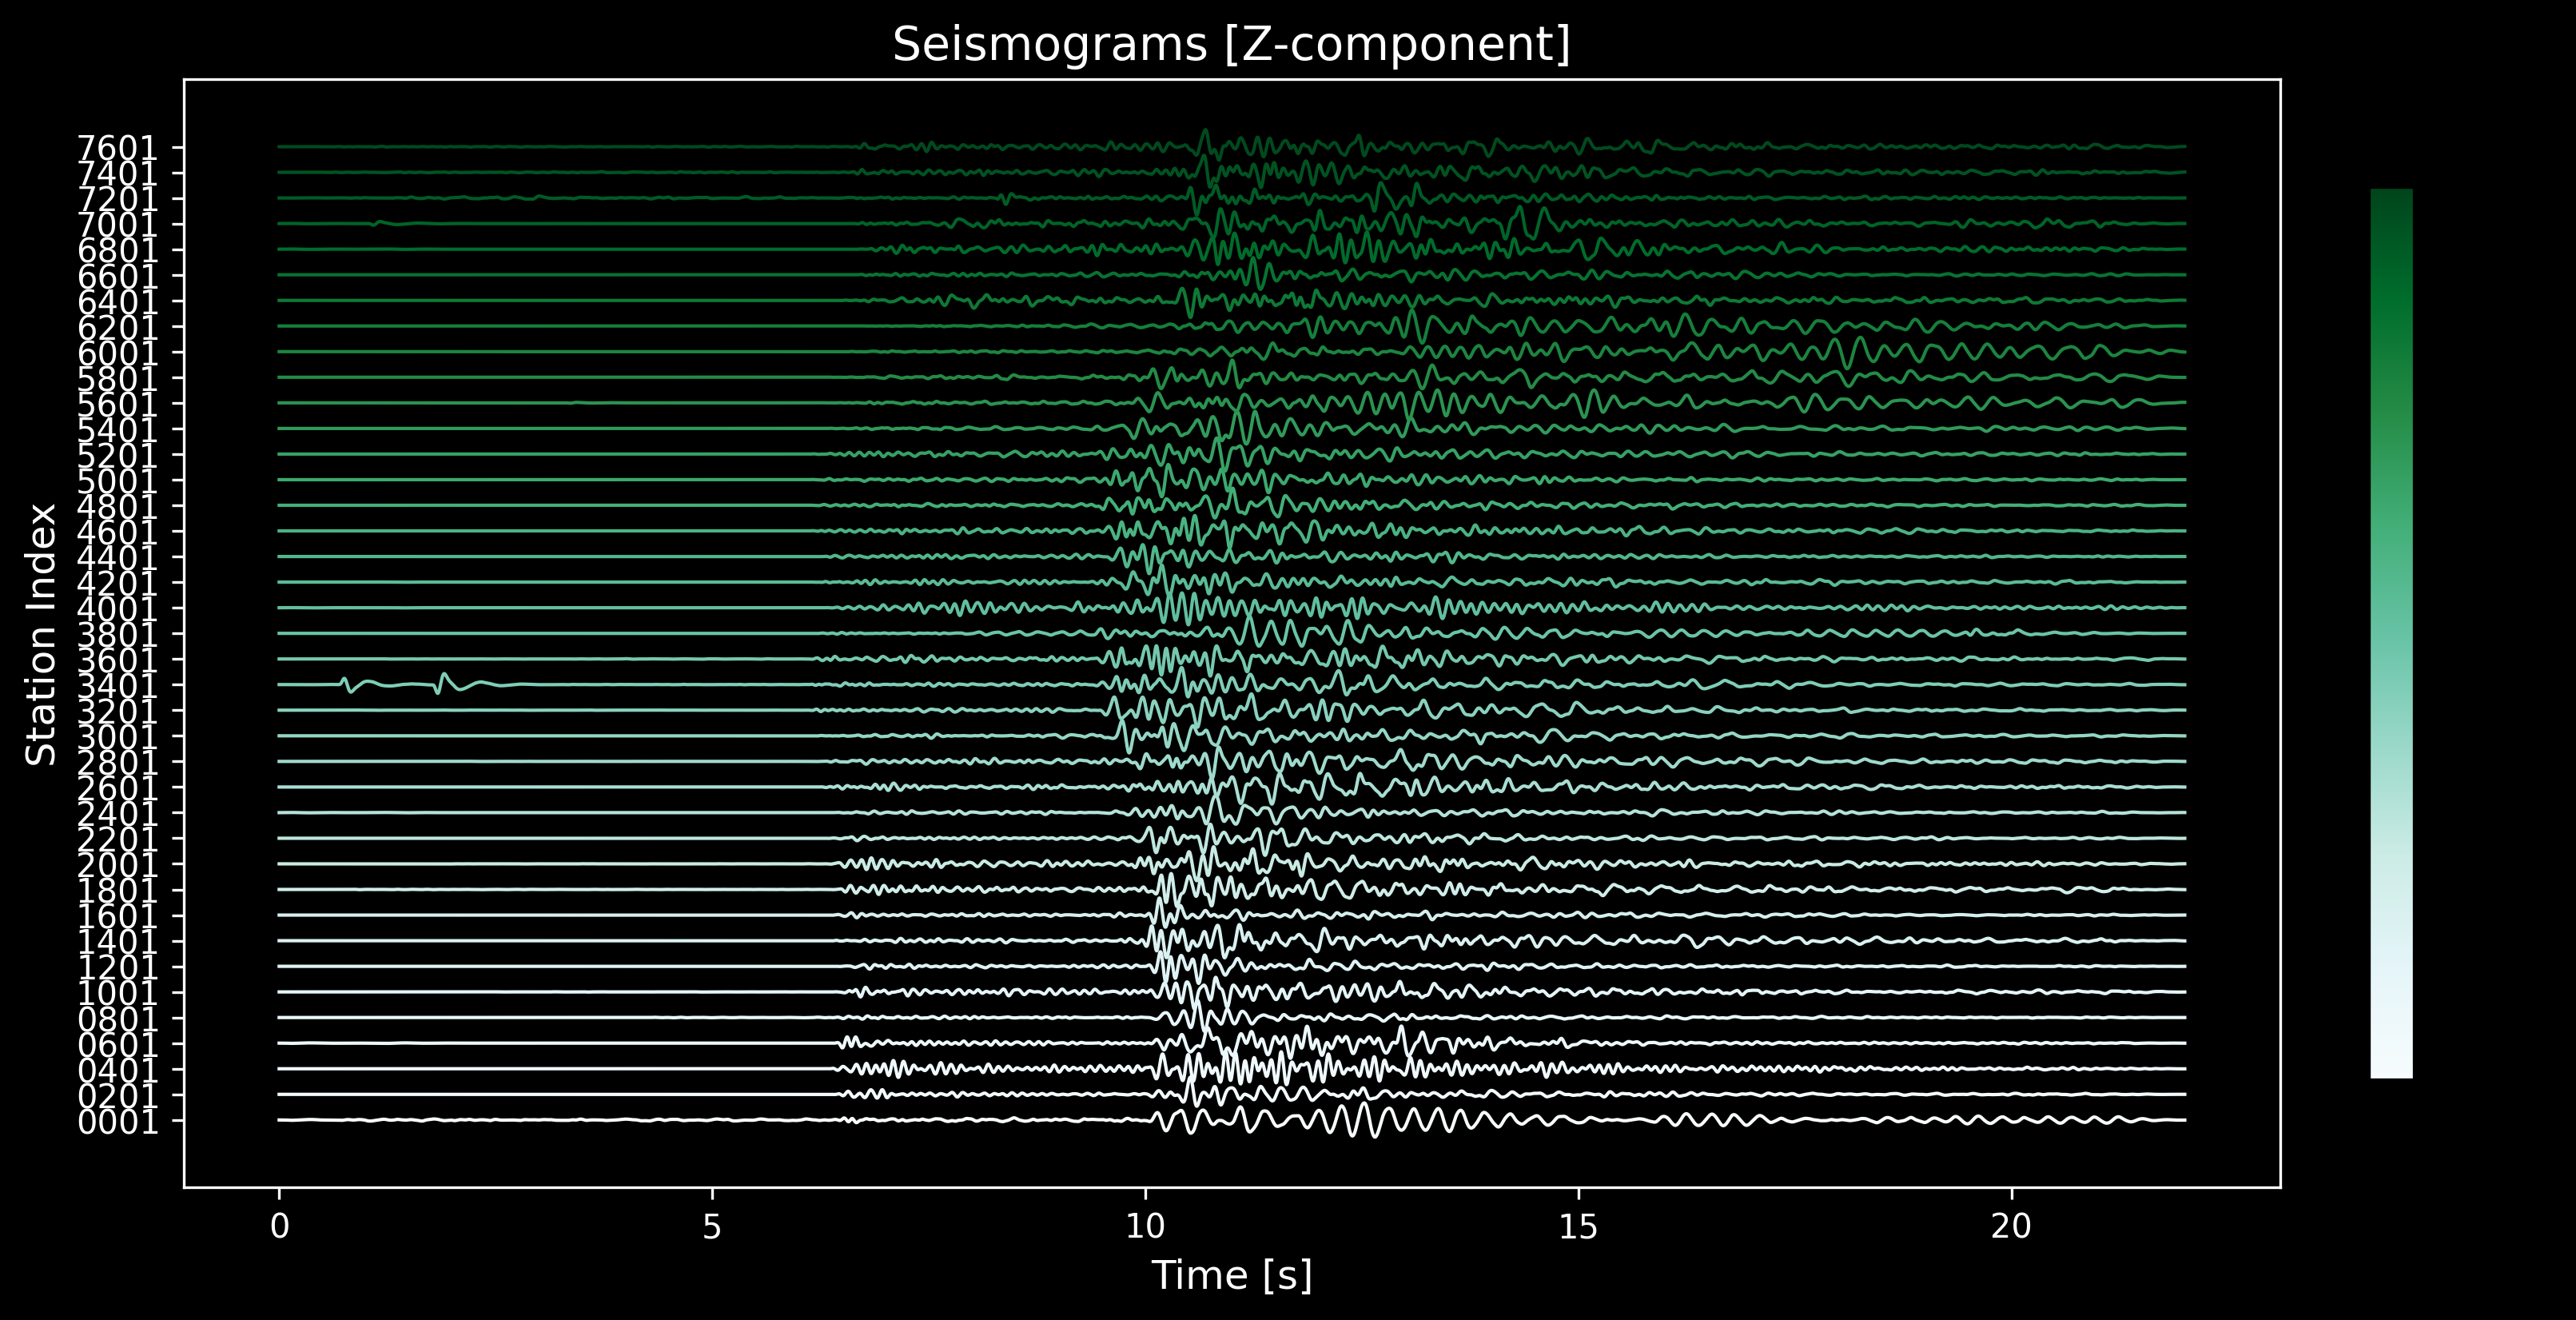

In [122]:
import matplotlib.pyplot as plt
import numpy as np
from obspy import read
import matplotlib.cm as cm

# Path to the new MiniSEED file


# Read the MiniSEED file
st = read(path)

# Select only Z-components
st = st.select(component="Z")

# Preprocess: Detrend, Taper, Bandpass Filter, and Normalize
st.detrend("demean")
st.taper(0.05, type="cosine")
st.filter("bandpass", freqmin=2.0, freqmax=10)

# Normalize each trace
for tr in st:
    tr.data = tr.data / np.max(np.abs(tr.data))

# Create the figure with a dark background
fig, ax = plt.subplots(figsize=(12, 6), dpi=300)
ax.set_facecolor("black")
fig.patch.set_facecolor("black")

# Select only every 200th seismogram for simplicity (you can adjust the step as needed)
indices_to_plot = range(0, len(st), 200)

# Time axis
t = np.linspace(0, st[0].stats.npts / st[0].stats.sampling_rate, st[0].stats.npts)

# Normalize station index to the color map
norm = plt.Normalize(vmin=0, vmax=len(st) - 1)
cmap = plt.cm.get_cmap("BuGn", len(st))

# Plot each trace with an offset and color from the colormap
offset = 1.5  # Vertical offset between traces
for i, idx in enumerate(indices_to_plot):
    tr = st[idx]
    color = cmap(norm(idx))  # Get the color based on station index
    ax.plot(t, tr.data + i * offset, color=color, lw=1)

# Formatting the plot
ax.set_xlabel("Time [s]", color="white", fontsize=12)
ax.set_ylabel("Station Index", color="white", fontsize=12)
ax.set_yticks(np.arange(len(indices_to_plot)) * offset)
ax.set_yticklabels([st[idx].stats.station for idx in indices_to_plot], color="white", fontsize=10)
ax.spines["top"].set_color("white")
ax.spines["bottom"].set_color("white")
ax.spines["left"].set_color("white")
ax.spines["right"].set_color("white")
ax.tick_params(colors="white")

# Title
ax.set_title("Seismograms [Z-component]", color="white", fontsize=14)

# Create a colorbar to map the color scale to station indices
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Set the array to an empty one to create the colorbar
cbar = plt.colorbar(sm, ax=ax, label='Station Index', location='right', fraction=0.02, pad=0.04)
cbar.ax.tick_params(labelsize=8)

# Show the plot
plt.show()


In [123]:
st = read(path)

print(st)

7750 Trace(s) in Stream:

OF.0001..HHZ | 2024-08-25T17:55:29.610000Z - 2024-08-25T17:55:51.606000Z | 250.0 Hz, 5500 samples
...
(7748 other traces)
...
OF.7750..HHZ | 2024-08-25T17:55:29.610000Z - 2024-08-25T17:55:51.606000Z | 250.0 Hz, 5500 samples

[Use "print(Stream.__str__(extended=True))" to print all Traces]


In [124]:
from obspy import read, Stream, Trace
import numpy as np

save_path_das = save_path  # Path for DAS channels MSEED file
save_path_hybrid = save_path_subsampling  # Path for hybrid stations MSEED file

# Create empty stream to hold the processed data
filtered_stream = Stream()

# Copy the original stream
# Read the MiniSEED file
das = read(path)

# Preprocess: Detrend, Taper, Bandpass Filter, and Normalized
das.detrend("demean")
das.taper(0.05, type="cosine")
das.filter("bandpass", freqmin=2.0, freqmax=10)
g = das.copy()

# Process the traces by summing every 10 channels and assigning the value to the middle channel
for i in range(5, len(g) - 5, 10):  # Step by 10 to group channels
    traces_to_stack = g[i-5:i+5]  # Select 10 consecutive traces (5 before and 5 after the middle)
    
    if len(traces_to_stack) < 10:
        continue  # Skip if there are fewer than 10 traces
    
    stacked_data = np.sum([trace.data.astype(np.float64) for trace in traces_to_stack], axis=0)
    
    # Create new trace with stacked data and assign metadata from the middle trace
    middle_trace = traces_to_stack[5]  # The middle trace is the 6th one (index 5)
    new_trace = Trace(data=stacked_data)
    new_trace.stats = middle_trace.stats.copy()  # Copy metadata from the middle trace
    # new_trace.stats.channel = "STK"  # Assign a stacked channel name if necessary
    
    filtered_stream.append(new_trace)

# Save the filtered DAS channels stream
filtered_stream.write(save_path_das, format="MSEED")

# Save the hybrid stream
# filtered_stream.write(save_path_hybrid, format="MSEED")

print(filtered_stream)

# Check if all traces have the same sampling rate
sampling_rates = [trace.stats.sampling_rate for trace in filtered_stream]

# Check if all elements in sampling_rates are the same
if len(set(sampling_rates)) == 1:
    print(f"All traces have the same sampling rate: {sampling_rates[0]} Hz")
else:
    print("The traces have different sampling rates.")


774 Trace(s) in Stream:

OF.0006..HHZ | 2024-08-25T17:55:29.610000Z - 2024-08-25T17:55:51.606000Z | 250.0 Hz, 5500 samples
...
(772 other traces)
...
OF.7736..HHZ | 2024-08-25T17:55:29.610000Z - 2024-08-25T17:55:51.606000Z | 250.0 Hz, 5500 samples

[Use "print(Stream.__str__(extended=True))" to print all Traces]
All traces have the same sampling rate: 250.0 Hz


In [125]:
print(sta_filt)

15 Trace(s) in Stream:
HA.ATHR..HHZ | 2024-08-25T17:55:29.610000Z - 2024-08-25T17:55:51.610000Z | 100.0 Hz, 2201 samples
HA.ATHR..HHE | 2024-08-25T17:55:29.610000Z - 2024-08-25T17:55:51.610000Z | 100.0 Hz, 2201 samples
HA.ATHR..HHN | 2024-08-25T17:55:29.610000Z - 2024-08-25T17:55:51.610000Z | 100.0 Hz, 2201 samples
HL.VLS..HHZ  | 2024-08-25T17:55:29.610000Z - 2024-08-25T17:55:51.610000Z | 100.0 Hz, 2201 samples
HL.VLS..HHE  | 2024-08-25T17:55:29.610000Z - 2024-08-25T17:55:51.610000Z | 100.0 Hz, 2201 samples
HL.VLS..HHN  | 2024-08-25T17:55:29.610000Z - 2024-08-25T17:55:51.610000Z | 100.0 Hz, 2201 samples
HP.FSK..HHN  | 2024-08-25T17:55:29.610000Z - 2024-08-25T17:55:51.610000Z | 100.0 Hz, 2201 samples
HP.FSK..HHE  | 2024-08-25T17:55:29.610000Z - 2024-08-25T17:55:51.610000Z | 100.0 Hz, 2201 samples
HP.FSK..HHZ  | 2024-08-25T17:55:29.610000Z - 2024-08-25T17:55:51.610000Z | 100.0 Hz, 2201 samples
HT.DMLN..HHN | 2024-08-25T17:55:29.609999Z - 2024-08-25T17:55:51.609999Z | 100.0 Hz, 2201 sampl

In [126]:
from obspy import read, Stream, Trace
import copy

save_path_hybrid = save_path_subsampling  # Path for hybrid stations MSEED file
selected_stations_hybrid = ["0223", "1200", "3039", "5000", "7185"]  # Selected station IDs

# Create empty stream for hybrid data
subsampled_filtered_stream = Stream()

# Load the previously processed stacked DAS stream
das_1 = read(path)


# Preprocess: Detrend, Taper, Bandpass Filter, and Normalize
das_1.detrend("demean")
das_1.taper(0.05, type="cosine")
das_1.filter("bandpass", freqmin=2.0, freqmax=10)
e = das_1.copy()

# Select only the traces corresponding to selected hybrid stations
for a in selected_stations_hybrid:
    b_new = e.select(station=str(a))
    c_new = b_new.resample(stations_sf)
    
    trace_N = copy.deepcopy(c_new[0]) 
    trace_E = copy.deepcopy(c_new[0]) 
    trace_N.stats.channel = "HHE"
    trace_E.stats.channel = "HHN"

    subsampled_filtered_stream.append(c_new[0])
    subsampled_filtered_stream += trace_N
    subsampled_filtered_stream += trace_E

# Combine with filtered seismometer data
subsampled_filtered_stream_hybrid = subsampled_filtered_stream + sta_filt

print(subsampled_filtered_stream_hybrid)

# Save the hybrid stream
subsampled_filtered_stream_hybrid.write(save_path_hybrid, format="MSEED")


30 Trace(s) in Stream:

OF.0223..HHZ | 2024-08-25T17:55:29.610000Z - 2024-08-25T17:55:51.600000Z | 100.0 Hz, 2200 samples
...
(28 other traces)
...
HT.ITHC..HHN | 2024-08-25T17:55:29.610000Z - 2024-08-25T17:55:51.610000Z | 100.0 Hz, 2201 samples

[Use "print(Stream.__str__(extended=True))" to print all Traces]


In [37]:
import csv

# Path to your input CSV file
input_file_path = '/home/emanuele/data/emanuele/loki-das/cefalonia/geometry/das_channels_edited.csv'

# Path to save the output .dat file
output_file_path = '/home/emanuele/data/emanuele/loki-das/Traveltimes/cefalonia/stations_cefalonia_total.dat'

# Open the input CSV file
with open(input_file_path, newline='', encoding='utf-8') as csvfile:
    reader = csv.DictReader(csvfile)
    
    # Prepare the output data in the requested format
    output_data = []
    for record in reader:
        id_value = int(record["channel_number_recorded"])   # Modify ID generation logic if needed
        lat = float(record["latitude"])
        lon = float(record["longitude"])
        depth = 0.0
        output_data.append(f"{id_value} {lat:.4f} {lon:.4f} {depth:.1f}")
    
# Write the output data to the .dat file
with open(output_file_path, "w", encoding='utf-8') as file:
    file.write("\n".join(output_data))

print(f"Data has been saved in '{output_file_path}'")


Data has been saved in '/home/emanuele/data/emanuele/loki-das/Traveltimes/cefalonia/stations_cefalonia_total.dat'


## AUTOMATIC DAS DATA SELECTION

In [ ]:
selected_stations_hybrid = selected_stations

#selected_stations = ["0223", "0500", "0800", "1000", "1200", "1400", "1663", "1723", "2000", "2487", "3039", "4000", "5000", "6000", "7150", "7185"]  # Replace with your station IDs
#selected_stations = ["0223", "0500", "1200", "3039", "4000", "5000", "7150", "7185", "7350"]  # Replace with your station IDs
#selected_stations_hybrid = ["0223",  "1200", "3039", "5000",  "7185"]  # Replace with your station IDs


filtered_stream = Stream()
subsampled_filtered_stream = Stream()

g = st.copy()

for a in selected_stations: 
    
    b = g.select(station=str(a))
    filtered_stream.append(b[0])

ch = ["HHE", "HHN", "HHZ"]

e = st.copy()

for a in selected_stations_hybrid: 
    
    b_new = e.select(station=str(a))
    c_new = b_new.resample(stations_sf)

    trace_N = copy.deepcopy(c_new[0]) 
    trace_E = copy.deepcopy(c_new[0]) 
    trace_N.stats.channel = "HHE"
    trace_E.stats.channel = "HHN"

    subsampled_filtered_stream.append(c_new[0])
    subsampled_filtered_stream += trace_N
    subsampled_filtered_stream += trace_E


filtered_stream.write(save_path, format="MSEED")

#sta_filt_only_z = sta_filt.copy()

#sta_filt_only_z = sta_filt_only_z.select(channel="*Z")



subsampled_filtered_stream_hydrid = subsampled_filtered_stream + sta_filt

print(subsampled_filtered_stream)


subsampled_filtered_stream_hydrid.write(save_path_subsampling, format="MSEED")





# %%
das = read(save_path_subsampling)

print(das)

das_filt = das.copy()

das = das.detrend("demean")  
das = das.taper(0.05, type='cosine')
das_filt = das.filter("bandpass", freqmin=2, freqmax = 15)  
das_filt.normalize()

# Plot normalized traces
das_filt.plot()

das_filt.write(save_path_subsampling, format="MSEED")

# %%
